1. Implement 2D convolution manually using nested loops
2. Visualize convolution kernels and their effect on images
3. Test convolution invariance under simple transformations

In [42]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [43]:
img_path = 'img.jpg'
image = np.array(Image.open(img_path).convert('L'), dtype=np.float32) / 255.0

average filter (blur)

In [44]:
filter_1 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9.0

sharpening filter

In [45]:
filter_2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

In [46]:
def convolve2d(input_img, kernel): #padding == same, strade == 1    
    h, w = input_img.shape
    output_img = np.zeros((h, w), dtype=np.float32)    

    # add padding    
    k_h, k_w = kernel.shape
    pad_h = (k_h - 1) // 2    
    pad_w = (k_w - 1) // 2
    
    input_img = np.pad(input_img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)    
    
    for i in range(h):        
        for j in range(w):
            receptive_field = input_img[i: i+k_h, j: j+k_w]
            output_img[i, j] = np.sum(receptive_field * kernel)            


    return output_img

In [47]:
output_image_1 = convolve2d(image, filter_1)
output_image_2 = convolve2d(image, filter_2)

Visualize them

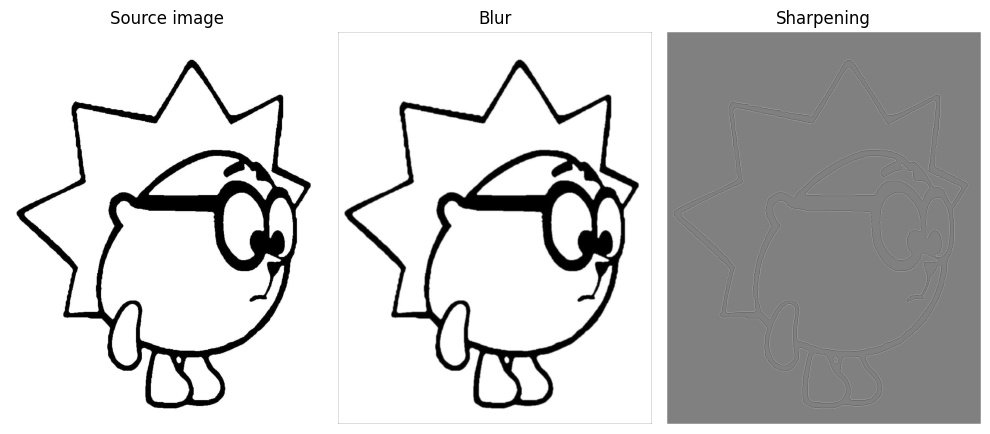

In [48]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 3, 1) 
plt.imshow(image, cmap='gray')
plt.title("Source image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output_image_1, cmap='gray')
plt.title(f"Blur")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output_image_2, cmap='gray')
plt.title(f"Sharpening")
plt.axis('off')

plt.tight_layout() 
plt.show()